# [AI 이노베이션 스퀘어] 12기 고급 시각반
- github: https://github.com/hysKim1/AI_Vision
    - [파이썬 공식문서]https://docs.python.org/ko/3/
    - [Numpy 공식문서]https://numpy.org/devdocs/
    - [ML]https://developers.google.com/machine-learning/crash-course/ml-intro?hl=ko
    - [DL]https://www.tensorflow.org/?hl=ko
      
---
* [ RNN2](#RNN2 )
    * [Long term dependency ](#Long-term-dependency )
* [LSTM ](#LSTM)

---

## RNN2
1. CNN
  - locally connected
    - shared weights 
  - Models: LeNet,AlexNet,JFNet, VGG, GoogLeNEt,ResNet
  - 성능 최적화
    - Batch Normalization(BN): 
    - Data Augmentation 
  - Transfer Learning
    - Incremental Learning
      - Catastrophic Forgetting  
      - Knowledge Distillation
        - Light weights model(경량화된 모델)
          - convolution자체를 바꿈 eg. dilated convolution 
 - 활용: object detection, semantic segmentation, locallization

2. RNN : 
  - **순차적** 데이터에 최적 ( 동영상,자연어,음성에 많이 활용)

In [ ]:
import tensorflow as tf

In [ ]:
#tf.debugging.set_log_device_placement(True) #CPU or GPU

In [ ]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.mnist.load_data() #hold out

11493376/11490434 [==============================] - 0s 0us/step


activation function 2가지 
- layer 내부
- 별도의 layer
  - eg. batch normalization : 레이어가 많아도 안정적으로 학습 (layer,weight,instnace, group normalization...)

In [ ]:
tf.keras.layers.Dense(64,activation='relu')

tf.keras.layers.Dense(64)
tf.keras.layers.BatchNormalization()
tf.keras.layers.Activation('relu')

## RNN in Keras
- keras 에서는 직관적이지 못하고 추상적
- 다양한 방법을 지원

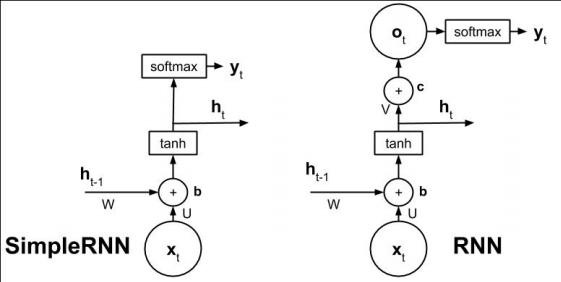
  - RNN (original) 
    - output layer wegiths 존재
  - simple RNN 
    - LSTM 중복되어서 생략함 
    - `tf.keras.layers.SimpleRNN(units) 
      - units :출력 갯수

units
 - CNN 인간의 뛰어넘는 성공한 모델들을 관례상 따름
 - RNN 구조 상 학습이 잘 안되어 크기를 작게 함

input_shape
- 영상 해석 : 각 행 별로 순서대로 들어감  ( 28x28 : 28개 단어가 28줄로 들어간다) 

In [ ]:
tf.keras.layers.SimpleRNN( units) # Dense(), Conv2D()

In [ ]:
model= tf.keras.models.Sequential([
      tf.keras.layers.SimpleRNN(10, input_shape=( 28,28 ) )    # (None, 10) 
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 10)                390       
Total params: 390
Trainable params: 390
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# weights + bias + 10=390
 28*10+ 10*10 + 10 

390

In [ ]:
model(X_train) # (60000, 28,28)

<tf.Tensor: shape=(60000, 10), dtype=float32, numpy=
array([[ 0.11685292, -0.27188706, -0.26057956, ..., -0.1721199 ,
         0.00541393,  0.26554117],
       [ 0.60364145, -0.41106617,  0.00602171, ..., -0.21911363,
         0.5884861 , -0.15806794],
       [ 0.61603963, -0.62227917,  0.07432479, ..., -0.09825835,
        -0.78962183,  0.53511286],
       ...,
       [-0.15649825,  0.23550598, -0.79625523, ...,  0.37193486,
        -0.1325343 ,  0.6860386 ],
       [ 0.12433068,  0.23974733,  0.16050085, ..., -0.23386565,
         0.42140082, -0.0411865 ],
       [ 0.27056536, -0.5993022 ,  0.10297769, ...,  0.06315491,
        -0.26349387,  0.65983224]], dtype=float32)>

In [ ]:
temp=X_train[0][tf.newaxis]
model( temp )  # (1,28,28) 0번째 데이터 넣으면 결과 10개 나옴( 아직 학습 안되어서 초기값 기반)

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[ 0.11685286, -0.2718871 , -0.26057953,  0.7383256 ,  0.23489252,
         0.17953256,  0.8272845 , -0.17211998,  0.00541383,  0.2655412 ]],
      dtype=float32)>

In [ ]:
import numpy as np
ss=np.resize(temp, (26,28))  #26번 28개씩 들어감 -> 0 padding으로 0채워서 길이 맞춰줌 
ss.shape

tf.keras.layers.SimpleRNN(10, input_shape=(26,28))

### return_sequences
- **활용 목적에 따라가서 모델 구성**을 다르게 해서 RNN 활용
   - 숨겨진 상태,상태전이 찾음
- return_sequences=False
  - many to 1 
- return_sequences=True
  - 1 to many

In [ ]:
temp.shape  

(1, 28, 28)

In [ ]:
# return_sequences=True : 결과값 sequences 로 만들어줌 순서적 특징을 뽑아냄 
model= tf.keras.models.Sequential([
      tf.keras.layers.SimpleRNN(10, input_shape=( 28,28 ),return_sequences=True )    # one to many          
])
model(temp).shape      # 매 28개마다 각각에 대해서 10개씩 결과 -> 순서적 특징

TensorShape([1, 28, 10])

In [ ]:
# return_sequences=False
model= tf.keras.models.Sequential([
      tf.keras.layers.SimpleRNN(10, input_shape=( 28,28 ),return_sequences=False )   # many to one   (Flatten 해도 상과 없음)                   
])
model(temp).shape      # 마지막에 최종적 10개 결과

TensorShape([1, 10])

In [ ]:
# return_sequences=False
model= tf.keras.models.Sequential([
      tf.keras.layers.SimpleRNN(10, input_shape=( 28,28 ),return_sequences=False , activation='tanh') ,
      #tf.keras.layers.Flatten(), #차이가 없음 
      tf.keras.layers.Dense(10,activation='softmax')                    
])
model.summary()

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_37 (SimpleRNN)    (None, 10)                390       
_________________________________________________________________
dense_13 (Dense)             (None, 10)                110       
Total params: 500
Trainable params: 500
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# return_sequences=True
model= tf.keras.models.Sequential([
      tf.keras.layers.SimpleRNN(10, input_shape=( 28,28 ),return_sequences=True , activation='tanh') ,
      tf.keras.layers.Dense(10,activation='softmax')                    
])
model.summary()

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_39 (SimpleRNN)    (None, 28, 10)            390       
_________________________________________________________________
dense_14 (Dense)             (None, 28, 10)            110       
Total params: 500
Trainable params: 500
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# return_sequences=True,  Flatten :  28x10을 1열로 바꾸어버림 -> 28x10=280
model= tf.keras.models.Sequential([
      tf.keras.layers.SimpleRNN(10, input_shape=( 28,28 ),return_sequences=True , activation='relu') ,
      tf.keras.layers.Flatten(), 
      tf.keras.layers.Dense(10,activation='softmax')                    
])
model.summary()

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_41 (SimpleRNN)    (None, 28, 10)            390       
_________________________________________________________________
flatten_4 (Flatten)          (None, 280)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                2810      
Total params: 3,200
Trainable params: 3,200
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#성능 좋은지 확인용 :parameters가 많으면 성능이 좋음  
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.fit(X_train,y_train, epochs=10) 

Epoch 1/10
1875/1875 [==============================] - 21s 11ms/step - loss: 5.9945 - acc: 0.7253
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.5310 - acc: 0.8636
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3794 - acc: 0.8919
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3256 - acc: 0.9049
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2920 - acc: 0.9126
Epoch 6/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2578 - acc: 0.9229
Epoch 7/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2259 - acc: 0.9321
Epoch 8/10
1875/1875 [==============================] - 22s 11ms/step - loss: 0.2127 - acc: 0.9353
Epoch 9/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2028 - acc: 0.9397
Epoch 10/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1973 - acc: 0.9397


In [ ]:
 # return_sequences = true
model.evaluate(X_test, y_test)  #정확도 94.0%

313/313 [==============================] - 1s 4ms/step - loss: 0.1937 - acc: 0.9404


[0.19368915259838104, 0.9404000043869019]

In [ ]:
#parameters 500개로 성능이 좋지 않음
model= tf.keras.models.Sequential([
      tf.keras.layers.SimpleRNN(10, input_shape=( 28,28 ),return_sequences=False , activation='relu') ,
      tf.keras.layers.Dense(10,activation='softmax')                    
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.fit(X_train,y_train, epochs=10) 

Epoch 1/10
1875/1875 [==============================] - 21s 11ms/step - loss: 2.4589 - acc: 0.2476
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 1.6327 - acc: 0.4068
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 1.4585 - acc: 0.4636
Epoch 4/10
1875/1875 [==============================] - 22s 12ms/step - loss: 1.3683 - acc: 0.4897
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 1.3117 - acc: 0.5043
Epoch 6/10
1875/1875 [==============================] - 21s 11ms/step - loss: 1.2705 - acc: 0.5182
Epoch 7/10
1875/1875 [==============================] - 20s 11ms/step - loss: 1.2362 - acc: 0.5330
Epoch 8/10
1875/1875 [==============================] - 21s 11ms/step - loss: 1.2054 - acc: 0.5444
Epoch 9/10
1875/1875 [==============================] - 22s 11ms/step - loss: 1.1806 - acc: 0.5565
Epoch 10/10
1875/1875 [==============================] - 22s 12ms/step - loss: 1.1568 - acc: 0.5724


In [ ]:
 #return_sequences=False 
model.evaluate(X_test, y_test)  #정확도 58.0%

313/313 [==============================] - 1s 3ms/step - loss: 1.1588 - acc: 0.5804


[1.158797264099121, 0.5803999900817871]

> - `tf.keras.layers.RNN`
    - cell instance 한 개
    - 고급기법에 사용

### return_state
- 맨 마지막 레이어에 state 변활할지 안할지 결정
- `return_state=True` 
  - Functional API:  Model

In [ ]:
# return_state=True 
inp= tf.keras.Input((28,28))
rnn=tf.keras.layers.SimpleRNN(10, return_state=True)(inp) 
model=tf.keras.models.Model(inputs=inp, outputs=rnn) #functional paradigm 

In [ ]:
model.summary()  #multi-outputs (y_t, h_t)

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
simple_rnn_43 (SimpleRNN)    [(None, 10), (None, 10)]  390       
Total params: 390
Trainable params: 390
Non-trainable params: 0
_________________________________________________________________




### TimeDistributed
- many to many 구조: 각각의 dense layer를 wrapper 방식으로  감쌈 
- layer wrapper
- input 을 최소 3차원의 layer를 받음 
- `keras.layers.TimeDistributed(layer)`

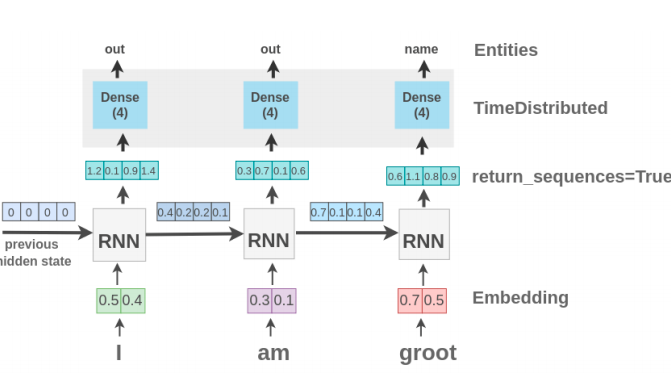

In [ ]:
# TimeDistributed 3차원 받음 : return_sequences=True : TensorShape([1, 10])  -> TensorShape([1, 28, 10]) 
layer1= tf.keras.layers.SimpleRNN(10, input_shape=(28,28), return_sequences=True ) 

# TimeDistributed: Dense 분배
dense= tf.keras.layers.Dense(10)
layer2=tf.keras.layers.TimeDistributed(dense ) # wrapper방식으로 레이어를 감싸서 구현

In [ ]:
model= tf.keras.models.Sequential([
                                  layer1,
                                   layer2 # SimpleRNN이미 감쌌음
])

In [ ]:
model.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_34 (SimpleRNN)    (None, 28, 10)            390       
_________________________________________________________________
time_distributed_9 (TimeDist (None, 28, 10)            110       
Total params: 500
Trainable params: 500
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#위와 비교 했을때는 차이가 없음 time distributed 표기 외에 
model= tf.keras.models.Sequential([
      tf.keras.layers.SimpleRNN(10, input_shape=( 28,28 ),return_sequences=True , activation='tanh') ,
      #tf.keras.layers.Flatten(), #차이가 없음 
      tf.keras.layers.Dense(10,activation='softmax')                    
])
model.summary()

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_45 (SimpleRNN)    (None, 28, 10)            390       
_________________________________________________________________
dense_19 (Dense)             (None, 28, 10)            110       
Total params: 500
Trainable params: 500
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(8), input_shape=(10, 16)))

In [ ]:
model.summary()

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_11 (TimeDis (None, 10, 8)             136       
Total params: 136
Trainable params: 136
Non-trainable params: 0
_________________________________________________________________


### Long term dependency 
- 단기 기억은 잘 되나 점점 길어질수록 학습이 잘 안됨
   
   - Gradient Vanishing 문제 
    1. 활성 함수 sigmoid, tanh 사용대신에 `relu`
      - sigmoid, tanh : 깊을수록 미분값이 0에 가까워지면서 0이 계속 전달되면서 학습이 잘 안됨 
    2. 초기값 initalizer
 
   - gradient exploding 문제
        - 학습하면서 값들이 커짐
    1. 아주 작은 초기값
    2. gradient clipping 일정 이상 값을 잘름

In [1]:
x=tf.Variable(tf.range(-8., 8, .1))
with tf.GradientTape(persistent=True) as t:
  y=tf.nn.sigmoid(x)

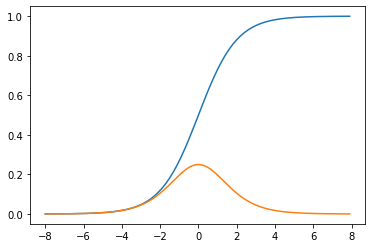

In [6]:
import matplotlib.pyplot as plt

plt.plot(x.numpy(),y.numpy()) #sigmoid
plt.plot(x.numpy(),t.gradient(y,x).numpy() )#미분한 sigmoid  끝에는 0에 가까워서 gradient vanishing

In [ ]:
tf.keras.layers.Dense(kernel_initializer=, bias_initializer=) # 기본 랜덤하게 지정

In [12]:
x=tf.random.normal((4,4))

In [13]:
#gradient update 1000번 랜덤한값 곱함
for i in range(1000):
  x = tf.matmul(x, tf.random.normal((4,4)))

In [14]:
x 

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan]], dtype=float32)>

In [ ]:
dir(tf.keras.optimizers.Optimizer) #상속받는애는 2가지 옵션 

['_HAS_AGGREGATE_GRAD',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_add_variable_with_custom_getter',
 '_aggregate_gradients',
 '_assert_valid_dtypes',
 '_call_if_callable',
 '_checkpoint_dependencies',
 '_clip_gradients',
 '_compute_gradients',
 '_create_all_weights',
 '_create_hypers',
 '_create_or_restore_slot_variable',
 '_create_slots',
 '_decayed_lr',
 '_deferred_dependencies',
 '_dense_apply_args',
 '_distributed_apply',
 '_distribution_strategy_scope',
 '_fallback_apply_state',
 '_gather_saveables_for_checkpoint',
 '_get_hyper',
 '_handle_defer

In [ ]:
tf.keras.layers.ConvLSTM2D #비디오 영상처리에 사용하는 기법 

In [ ]:
model=tf.keras.models.Sequential([
                                  tf.keras.layers.SimpleRNN(10,return_sequences=True
                                                            , input_shape=(28,28)),
                                  tf.keras.layers.SimpleRNN(10,return_sequences=True),
])

In [ ]:
model.summary() #이론적으로 순차적, 양방향 가능하나 연산이 느림 .. 

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_50 (SimpleRNN)    (None, 28, 10)            390       
_________________________________________________________________
simple_rnn_51 (SimpleRNN)    (None, 28, 10)            210       
Total params: 600
Trainable params: 600
Non-trainable params: 0
_________________________________________________________________


 참고: RNN.pdf
#### LSTM
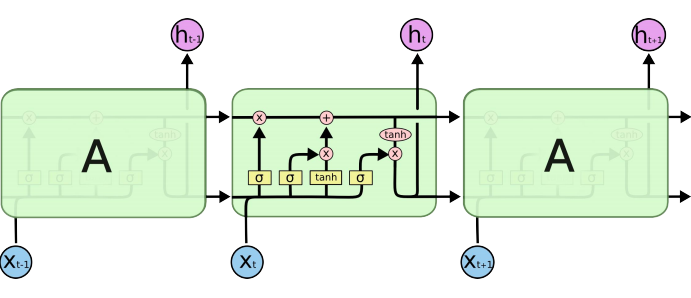

- Long Short-Term Memory
- '구조 자체를 변경'해서 인간의 사고 구조를 흉내내어 문제점을 해결
 - 현재 시점으로 부터 오래될수록 학습 문제를 해결하는 방법
1. **cell state 셀 상태 기억을 유지**하도록 컨베이어 벨트처럼 만듦(기억 저장)
2. 3개의 cell gates: 셀상태 유지하는 정도를 관리함
  - forget gate 기억
  - input gate  입력
      - 기억을 할지 안할지 결정
  - output gate 출력
- 연산이 복잡하고 성능 더 좋은 것들이 많고 더 복잡한게 많음